### Otimização dos Dados

- Continuando a etapa anterior, vamos tentar diminuir a predição de **Falsos Negativos**;

- Dessa vez, vamos abordar o tratamento dos nomes dos passegeiros, afim de que os prefixos, cujo indicam as classes sociais, possam auxiliar o modelo.

In [6]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import re

In [32]:
def get_data(train_path, test_path):
    train = pd.read_csv(train_path, header=0)
    test = pd.read_csv(test_path, header=0)
    data_train = train.to_numpy()
    n_row, n_col = data_train.shape
    X = data_train[:, 1:n_col]
    y = data_train[:,0]
    X_test = test.to_numpy()
    return X, y, X_test

def get_scale(train, test):
    scaler = StandardScaler()
    X = scaler.fit_transform(train)
    X_test = scaler.transform(test) 
    return X, X_test

In [14]:
df_train_tratado = pd.read_csv("dados/treino_tratado_2.csv", header=0)
df_test_tratado = pd.read_csv("dados/teste_tratado_2.csv", header=0)

df_train = pd.read_csv("dados/train.csv", header=0)
df_test = pd.read_csv("dados/train.csv", header=0)


In [15]:
def extrair_prefixo(nome):
    prefixo = re.findall(r'\b(?:Mr|Mrs|Miss|Master|Dr)\b', nome)
    if prefixo:
        return prefixo[0]
    else:
        return None
    
df_train_tratado["Prefixos"] = df_train["Name"].apply(extrair_prefixo)
df_test_tratado["Prefixos"] = df_test["Name"].apply(extrair_prefixo)

df_train_tratado.head()

,Survived,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Harbor_C,Harbor_Q,Harbor_S,Class_1,Class_2,Class_3,Prefixos
0,0,22.0,1,0,7.2500,0,1,0,0,1,0,0,1,Mr
1,1,38.0,1,0,71.2833,1,0,1,0,0,1,0,0,Mrs
2,1,26.0,0,0,7.9250,1,0,0,0,1,0,0,1,Miss
3,1,35.0,1,0,53.1000,1,0,0,0,1,1,0,0,Mrs
4,0,35.0,0,0,8.0500,0,1,0,0,1,0,0,1,Mr


In [17]:
df_train_tratado = pd.get_dummies(df_train_tratado, columns=["Prefixos"])
df_test_tratado = pd.get_dummies(df_test_tratado, columns=["Prefixos"])

df_train_tratado.head(2)

,Survived,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Harbor_C,Harbor_Q,Harbor_S,Class_1,Class_2,Class_3,Prefixos_Dr,Prefixos_Master,Prefixos_Miss,Prefixos_Mr,Prefixos_Mrs
0,0,22.0,1,0,7.2500,0,1,0,0,1,0,0,1,0,0,0,1,0
1,1,38.0,1,0,71.2833,1,0,1,0,0,1,0,0,0,0,0,0,1


- Agora, vamos verificar se há mudanças nas predições.

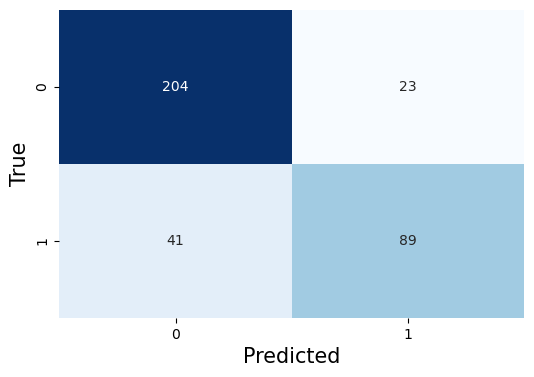

In [26]:
data_train = df_train_tratado.to_numpy()
n_row, n_col = data_train.shape
X = data_train[:, 1:n_col]
y = data_train[:,0]
X_test = df_test_tratado.to_numpy()

from sklearn.ensemble import RandomForestClassifier

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.4, random_state=5)

rf = RandomForestClassifier(max_depth=9, min_samples_leaf=15, min_samples_split=20, random_state=42)

model_rf = rf.fit(X_train, y_train)

y_pred = model_rf.predict(X_valid)

cm = confusion_matrix(y_true=y_valid, y_pred=y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted", fontsize=15)
plt.ylabel("True", fontsize=15)
plt.show()

- Houve uma melhora nas predições dos **Falsos Negativos**, porém, piorou o índice de **Falsos Positivos**, desse modo, vemos que as manipulações não estão sendo mais tão impactantes nas predições. Portanto, concluímos que com esses dados e conhecendo estes modelos de machine learning, chegamos ao limiar do aprendizado. Por fim, vamos aplicar o modelo ao dado de teste e finalizar a predição.

In [24]:
rf = RandomForestClassifier(max_depth=9, min_samples_leaf=15, min_samples_split=20, random_state=42)
model_rf = rf.fit(X, y)
y_pred = model_rf.predict(X_test)

prediction_rfc = pd.DataFrame()

Passenger_id = pd.read_csv("dados/passengerid.csv", header=0)
y_pred = np.array(y_pred, dtype="int")
prediction_rfc["PassengerId"] = np.array(Passenger_id["PassengerId"], dtype="int")
prediction_rfc["Survived"] = y_pred
prediction_rfc.to_csv('dados/prediction_rfc3.csv', index=False)

In [33]:
from sklearn.neighbors import KNeighborsClassifier

data_train = df_train_tratado.to_numpy()
n_row, n_col = data_train.shape
X = data_train[:, 1:n_col]
y = data_train[:,0]
X_test = df_test_tratado.to_numpy()

X_s, X_test_s = get_scale(X, X_test)

knn_final = KNeighborsClassifier(n_neighbors=28, metric='cosine')
model_knn = knn_final.fit(X_s,y)
y_pred = model_knn.predict(X_test_s)

prediction_knn = pd.DataFrame()

y_pred = np.array(y_pred, dtype="int")
prediction_knn["PassengerId"] = np.array(Passenger_id["PassengerId"], dtype="int")
prediction_knn["Survived"] = y_pred
prediction_knn.to_csv('dados/prediction_knn3.csv', index=False)
